In [5]:
#!/usr/bin/python
########### Python 2.7 #############
import http.client, urllib.request, urllib.parse, urllib.error, base64, re
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
import time
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

# major and minor plot seetings
majorLocator = MultipleLocator(200)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(50)

majoryLocator = MultipleLocator(10)
majoryFormatter = FormatStrFormatter('%d')
minoryLocator = MultipleLocator(2)

majorXLocator = MultipleLocator(24)
majorXFormatter = FormatStrFormatter('%d')
minorXLocator = MultipleLocator(6)

def history(a):
    
    body = a[2:-4]
    closeprice = []

    for key in body:
       if "Close" in key:
           c = key.split(':')
           close = float(re.findall('\d+\.\d+', c[1] )[0])
           closeprice.append(close) 

    return closeprice

def moving_average(x, n, type='simple'):
    """
    compute an n period moving average.

    type is 'simple' | 'exponential'

    """
    x = np.asarray(x)
    if type == 'simple':
        weights = np.ones(n)
    else:
        weights = np.exp(np.linspace(-1., 0., n))

    weights /= weights.sum()

    a = np.convolve(x, weights, mode='full')[:len(x)]
    a[:n] = a[n]
    return a

def plotcoin(closeprice):

    # create Bitcoin plot
    ema50 = moving_average(closeprice, 2, type='exponential')
    fig, ax1 = plt.subplots()
    ax1.plot(closeprice[-10:] , 'g-')
    ax1.plot(ema50[-10:] , 'r-') 
    ax1.set_title('Bitcoin Price Etoro') 
    ax1.set_xlabel('Time (1 Hour)', color='k')
    ax1.set_ylabel('Close price (USD)', color='k')
    ax1.tick_params(colors='k')
    ax1.grid(color='k', linestyle='-', linewidth=0.5)
    ax1.yaxis.set_major_locator(majorLocator)
    ax1.yaxis.set_major_formatter(majorFormatter)
    ax1.yaxis.set_minor_locator(minorLocator)
    ax1.xaxis.set_major_locator(majorXLocator)
    ax1.xaxis.set_major_formatter(majorXFormatter)
    ax1.xaxis.set_minor_locator(minorXLocator)
    plt.savefig('bitcoin.png')   # save the figure to file
    plt.close(fig)    # close the figure


conn = http.client.HTTPSConnection('candle.etoro.com')
# 480 is 480 periods of 1 hour, 100000 is Bitcoin
conn.request("GET", "/candles/asc.json/OneMinute/1001/100000")
response = conn.getresponse()
data = response.read()
#print(type(data))
data=data.decode("utf-8")
a = data.split(',')
closeprice = history(a)
#print(closeprice)
#print(len(closeprice))
conn.close()
#plotcoin(closeprice)


In [6]:
import numpy as np
inte=10
num_int=int(len(closeprice)/inte)
mat=[]
for i in range(0,num_int):
    mat.append(closeprice[i*inte:(i+1)*inte+1])
    
#print(mat)

In [7]:
media_k=[]
for j in range(0,num_int):
    mezzo=int((len(mat[j])-1)/2)
    x0=mat[j][mezzo]
    temp=[]
    for i in range(1,mezzo+1):
        temp.append((mat[j][mezzo+1]-mat[j][mezzo-i]))
    media_k.append(np.mean(temp))

100


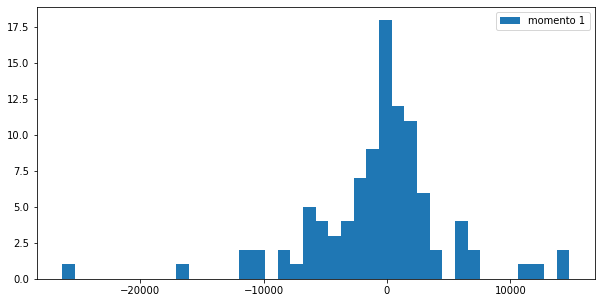

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
print(len(media_k))
nuova=[]
for i in range(len(media_k)):
    nuova.append(media_k[i]*(i+1))
bins=40
plt.figure(figsize=(10,5))
plt.hist(nuova,bins,density=False, histtype='bar', label='momento '+str(1))
plt.legend()
#plt.show()